In [223]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
from IPython.display import display
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set(rc={"figure.figsize": (12, 8)})


In [224]:
def scale_print_outliars(colname):
    global df
    data = df[colname]
    data_scaled = StandardScaler().fit_transform(data[:,np.newaxis]);
    low_range = data_scaled[data_scaled[:,0].argsort()][:10]
    high_range= data_scaled[data_scaled[:,0].argsort()][-10:]
    print('outer range (low) of the distribution:')
    display(low_range)
    print('outer range (high) of the distribution:')
    display(high_range)

def remove_outliars(colname, thred, modify  = False):
    global df
    coldata = df[colname]
    outliar_mask = (abs(coldata - np.mean(coldata)) < thred * np.std(coldata))| pd.isnull(coldata)
    coldata_noutliar = coldata[outliar_mask]
    if modify:
        df = df[outliar_mask]
    return df.shape[0]

def print_max(colname):
    global df
    sorted_df = df.sort_values(colname, ascending = False, inplace=False)
    print(colname, 'top 10 values:')
    display(sorted_df[colname][:10,])
    

def run_outliar_filter_stable(colname,threshold):
    print_max(colname)
    original_row_num = df.shape[0]
    old_shape = 0
    new_shape = 0
    while old_shape == 0 or (old_shape != new_shape):
        old_shape = new_shape
        new_shape = remove_outliars(colname,threshold,True)
    coldata = df[colname] 
    cur_row_num = coldata.shape[0]
    drop_percent = (row_num- cur_row_num)/row_num *100
    drop_percent_specific = (original_row_num - cur_row_num)/original_row_num * 100
    print("This operation drops rows:",drop_percent_specific)
    print("The percentage of total entries removed:",drop_percent)
    print("Skewness: %f" % coldata.skew())
    print("Kurtosis: %f" % coldata.kurt())
    print(df.shape)
    sns.distplot(coldata[~pd.isnull(coldata)])
    plt.figure()
    print_max(colname)

In [225]:
CSV_PATH = "../../data/csv/"
DF_NAME = "ksou_45074x19.csv"
df = pd.read_csv(CSV_PATH + DF_NAME)
row_num = 45074
col_num = 19

bathroom top 10 values:


6069     112.0
26840     21.0
23733     20.0
11983     20.0
23734     20.0
21431     12.0
13665     10.0
5432       8.0
1332       7.0
41149      6.0
Name: bathroom, dtype: float64

This operation drops rows: 0.017748591205573056
The percentage of total entries removed: 0.017748591205573056
Skewness: 0.533646
Kurtosis: 1.000909
(45066, 19)
bathroom top 10 values:


1332     7.0
19554    6.0
29883    6.0
41149    6.0
19553    5.0
20711    5.0
45035    5.0
1113     5.0
40871    5.0
390      5.0
Name: bathroom, dtype: float64

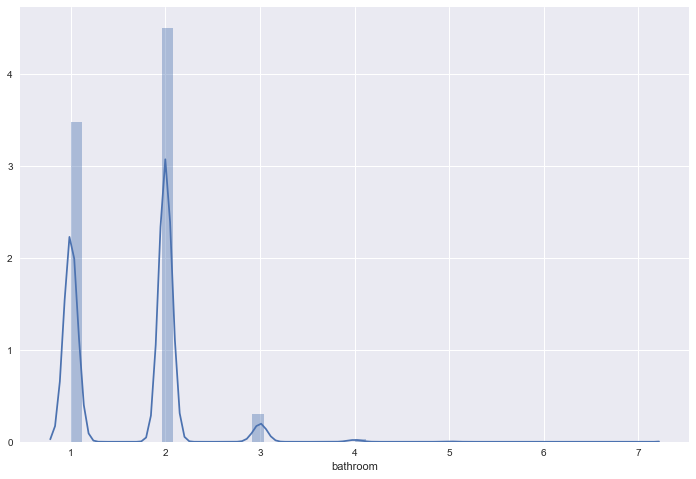

In [226]:
run_outliar_filter_stable('bathroom',10)

bedroom top 10 values:


21625    23.0
30905    23.0
25407    16.0
36540    16.0
25408    16.0
45015    10.0
5911      9.0
35643     8.0
4281      8.0
20482     8.0
Name: bedroom, dtype: float64

This operation drops rows: 0.011094838681045577
The percentage of total entries removed: 0.02884146070905622
Skewness: -0.244159
Kurtosis: 0.618664
(45061, 19)
bedroom top 10 values:


45015    10.0
5911      9.0
21906     8.0
34590     8.0
4281      8.0
20482     8.0
25995     8.0
905       8.0
23687     8.0
35643     8.0
Name: bedroom, dtype: float64

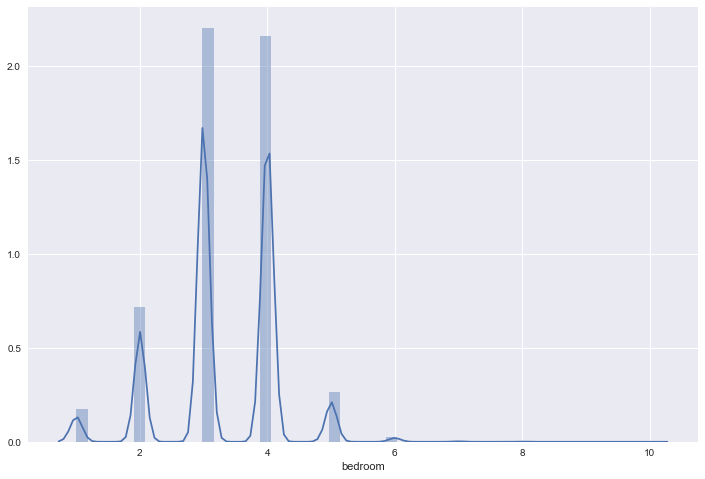

In [227]:
run_outliar_filter_stable('bedroom', 10)

carspace top 10 values:


9519     25.0
37936    20.0
37935    20.0
1048     19.0
28099    18.0
32847    17.0
37330    13.0
1045     13.0
39896    12.0
18715    12.0
Name: carspace, dtype: float64

This operation drops rows: 1.5512305541377245
The percentage of total entries removed: 1.5796246172960022
Skewness: 0.495539
Kurtosis: 1.492221
(44362, 19)
carspace top 10 values:


20282    4.0
15324    4.0
1559     4.0
39062    4.0
17562    4.0
1554     4.0
17563    4.0
20494    4.0
31846    4.0
4314     4.0
Name: carspace, dtype: float64

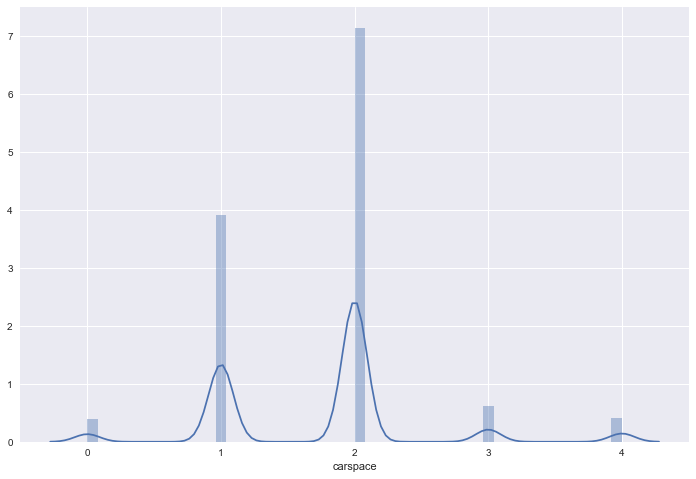

In [228]:
run_outliar_filter_stable('carspace', 4)

distanceToCBD top 10 values:


18142    18628.0
41107     3644.0
37982     3644.0
37979     3644.0
38276     3617.0
35338     3592.0
28034     3347.0
4852      3347.0
4851      3347.0
8811      3347.0
Name: distanceToCBD, dtype: float64

This operation drops rows: 2.1617600649204274
The percentage of total entries removed: 3.7072369880640723
Skewness: 4.263731
Kurtosis: 22.001311
(43403, 19)
distanceToCBD top 10 values:


37416    235.0
37420    235.0
37417    235.0
37418    234.0
43359    234.0
43356    234.0
44566    233.0
44565    233.0
44567    231.0
37319    230.0
Name: distanceToCBD, dtype: float64

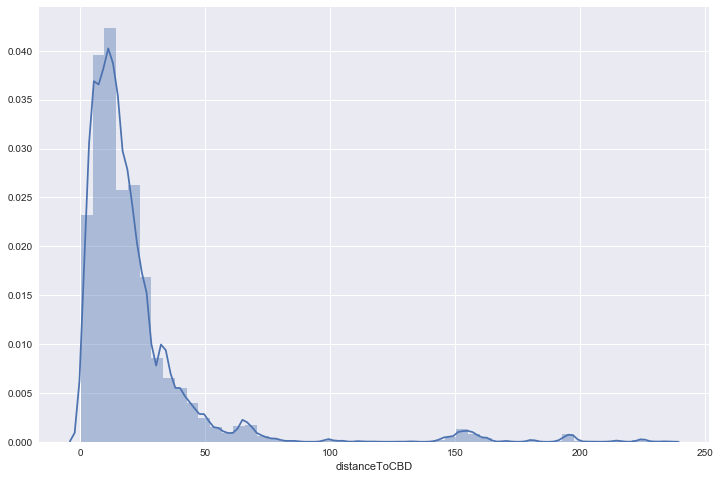

In [229]:
run_outliar_filter_stable('distanceToCBD', 8)

distanceToStation top 10 values:


37319    226.0
37416    221.0
37417    221.0
37420    220.0
37418    220.0
37256    190.0
35503    175.0
35504    175.0
43359    171.0
43356    171.0
Name: distanceToStation, dtype: float64

This operation drops rows: 2.891505195493399
The percentage of total entries removed: 6.491547233438346
Skewness: 2.823698
Kurtosis: 11.029168
(42148, 19)
distanceToStation top 10 values:


36760    29.0
36334    29.0
36952    29.0
8569     28.0
10497    28.0
27123    28.0
27124    28.0
8568     28.0
8585     28.0
8586     28.0
Name: distanceToStation, dtype: float64

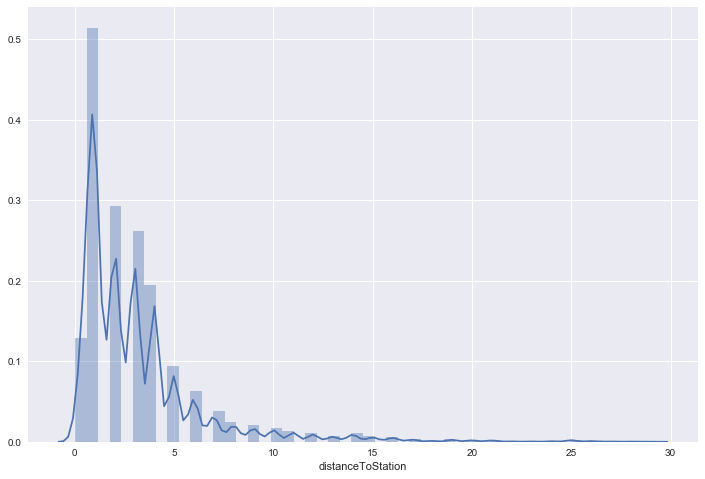

In [230]:
run_outliar_filter_stable('distanceToStation', 8)

soldPrice top 10 values:


9470     7250000
43043    7000000
4093     6850000
29589    6500000
28685    6250000
24638    6000000
4918     6000000
9475     5500000
28960    5100000
28634    5100000
Name: soldPrice, dtype: int64

This operation drops rows: 0.5765398120907279
The percentage of total entries removed: 7.030660691307627
Skewness: 2.039274
Kurtosis: 6.081284
(41905, 19)
soldPrice top 10 values:


43623    2125000
39869    2125000
7374     2110000
12804    2100000
1736     2100000
27703    2100000
39775    2100000
29588    2100000
20097    2100000
35993    2100000
Name: soldPrice, dtype: int64

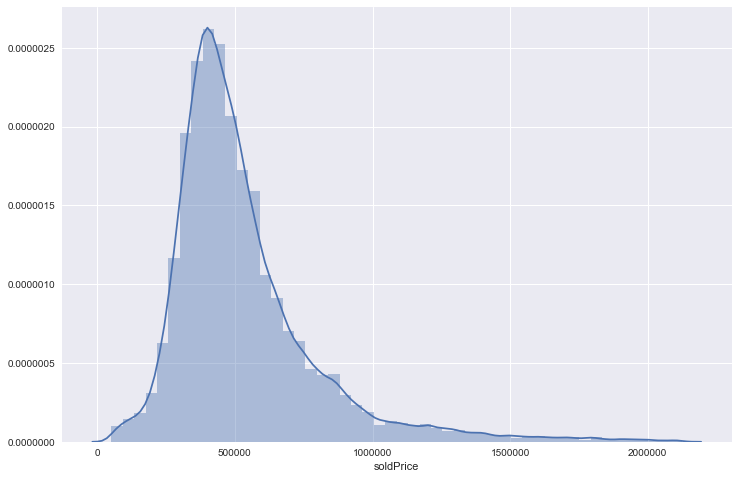

In [231]:
run_outliar_filter_stable('soldPrice', 6)

buildingSize top 10 values:


15919    14876.0
33076    11659.0
20516     9392.0
30091     8101.0
35064     7218.0
39126     7153.0
39125     7153.0
6289      6875.0
26195     6568.0
29182     6503.0
Name: buildingSize, dtype: float64

This operation drops rows: 0.3913614127192459
The percentage of total entries removed: 7.394506811021875
Skewness: 2.741500
Kurtosis: 16.042040
(41741, 19)
buildingSize top 10 values:


44901    975.0
40249    947.0
28846    943.0
28845    943.0
35496    938.0
30438    929.0
21739    929.0
39967    929.0
33183    901.0
33182    901.0
Name: buildingSize, dtype: float64

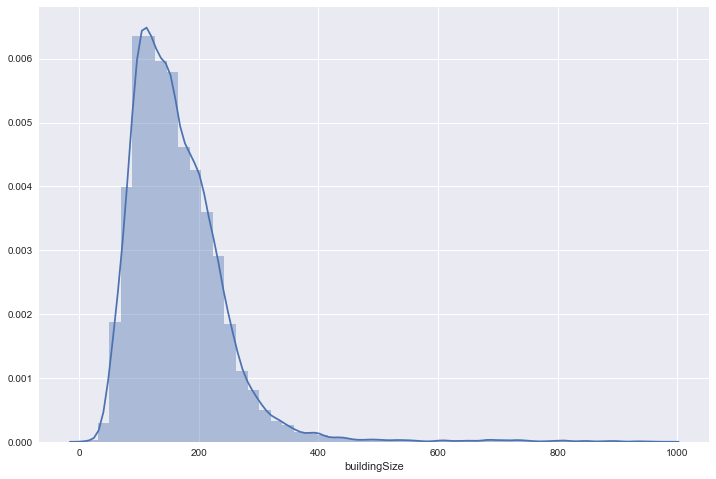

In [232]:
# we don't want to remove huge building size, but remove the impossible huge building is good

run_outliar_filter_stable('buildingSize', 10)

In [235]:
df.shape
df.to_csv(CSV_PATH+ 'ksou_cleaned.csv',index = False)